# PyCaret - Pima Indian Diabetes
PyCaret, an open source low-code machine learning library in Python, was announced on 16 April 2020. It promises to be an alternate low-code library that can be used to replace hundreds of lines of code with ease. This makes experiments exponentially fast and efficient.

This, when PyCaret does what it says, will be a useful tool for data science engineers. I attempted to develop a model using PyCaret by comparing the workflow with one of the projects I did on Pima Indian datasets. In that project, I was using XGBoost to predict the patient diabetic propensity and ROC-AUC achieved was 0.8336.

In [1]:
# email: sengtian@yahoo.com
# Dateset: 
#    1) dataset/pima-indians-diabetes.http://localhost:8888/notebooks/Downloads/Temp/Machine%20Learning/Python/pycaret_pima-indians-diabetes/PyCaret-Pima-Indians-Diabetes.ipynb#csv
#    2) https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
#
# PyCaret installation: 
#    pip install pycaret
#
# source:
#    1) pycaret.org
#    2) https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46

In [2]:
%config IPCompleter.greedy=True

import pandas as pd
import os

# to display all the columns of the dataframe in the notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# print version of PyCaret
from pycaret.utils import version

version()

1.0.0


In [4]:
dataset_dir = 'dataset'
dataset_filename = 'pima-indians-diabetes.csv'

dataset_fullname = os.path.join(os.getcwd(), dataset_dir)
dataset_fullname = os.path.join(dataset_fullname, dataset_filename)

# load the data and print the first few rows
df = pd.read_csv(dataset_fullname)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# view the number of rows and columns in the dataset
df.shape

(768, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A20D74AEB0>,
      dtype=object)

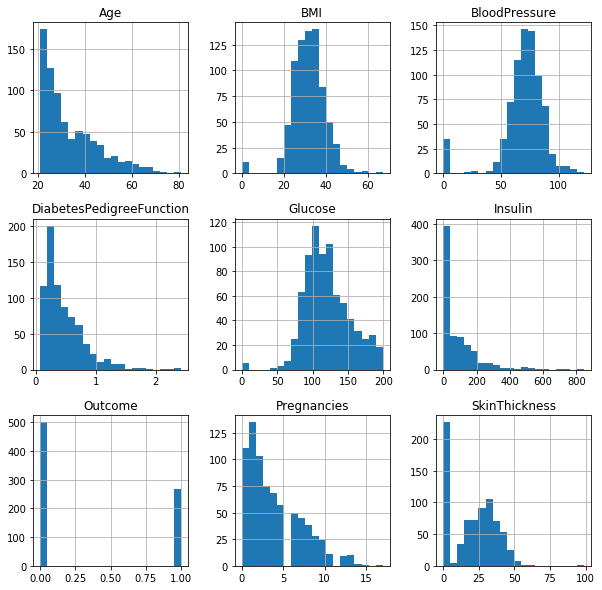

In [6]:
df.hist(bins=20, figsize=(10,10))

In [7]:
# import the module and initializing setup
from pycaret.classification import *

# set session id to 123 (arbitrarily)
#
# according to PyCaret documentation:
# session id is a pseudo random number generated by default if no session_id parameter is passed. 
# PyCaret distributes this id as a seed in all the functions to isolate the effect of randomization. 
# This allows for reproducibility at later time in the same or different environment.

# The setup() function initializes the environment in pycaret and creates the transformation 
# pipeline to prepare the data for modeling and deployment.
experiment = setup(
    session_id=123,
    data=df, 
    numeric_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 
    normalize=True,   #When set to True, the feature space is transformed using the normalized_method param 'zscore'
    feature_selection=True,
    train_size=0.75,                
    target='Outcome',
    silent=True
)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
# compare all models to evaluate performance is the recommended starting point for modeling

# 'Ridge Classifier' is removed for comparison as it does not have ROC-AUC score
compare_models(blacklist=['ridge'], turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.770600,0.821200,0.557600,0.739300,0.626500,0.467000
1,Linear Discriminant Analysis,0.767100,0.822100,0.557600,0.735500,0.623800,0.461000
2,SVM - Radial Kernel,0.756900,0.808300,0.518300,0.733200,0.593800,0.430000
3,Naive Bayes,0.751600,0.806300,0.572100,0.679700,0.612700,0.433500
4,MLP Classifier,0.746400,0.806200,0.562400,0.677300,0.603100,0.421600
5,Gradient Boosting Classifier,0.742900,0.814200,0.582400,0.668200,0.609600,0.421900
6,Ada Boost Classifier,0.741200,0.809200,0.541900,0.682500,0.586800,0.405200
7,Quadratic Discriminant Analysis,0.737700,0.802800,0.562600,0.652200,0.597000,0.405900
8,Gaussian Process Classifier,0.736000,0.800900,0.542900,0.673000,0.588600,0.399400
9,Extreme Gradient Boosting,0.735900,0.803700,0.557600,0.661700,0.596200,0.403400


In [9]:
# from the above table, the two algorithms to target are Logistic Regression and Linear Discriminant Analysis

# Linear Discriminant Analysis

In [10]:
# create the model
lda = create_model('lda')

# trained model object is stored in the variable 'lda'
# print the parameters of the model
print(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7586,0.8095,0.4762,0.7692,0.5882,0.4306
1,0.8103,0.8566,0.5000,0.9091,0.6452,0.5302
2,0.8103,0.8171,0.5000,0.9091,0.6452,0.5302
3,0.8276,0.8211,0.7000,0.7778,0.7368,0.6092
4,0.6724,0.7250,0.4500,0.5294,0.4865,0.2483
5,0.8621,0.8987,0.7500,0.8333,0.7895,0.6873
6,0.7018,0.8014,0.6500,0.5652,0.6047,0.3671
7,0.7368,0.8230,0.4500,0.6923,0.5455,0.3718
8,0.7544,0.8824,0.4500,0.7500,0.5625,0.4062
9,0.7368,0.7865,0.6500,0.6190,0.6341,0.4289


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [11]:
# tune the model to give best result
tuned_lda = tune_model('lda')

# show the parameters of the tuned model
print(tuned_lda)

# observation: 
#              Accuracy AUC     F1
# before tune: 0.7671   0.8221  0.6238
#  after tune: 0.7602   0.8193  0.6086

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7414,0.8481,0.4762,0.7143,0.5714,0.3967
1,0.7759,0.8539,0.4500,0.8182,0.5806,0.4448
2,0.7759,0.8237,0.4500,0.8182,0.5806,0.4448
3,0.8276,0.8066,0.7000,0.7778,0.7368,0.6092
4,0.6897,0.7053,0.4500,0.5625,0.5000,0.2790
5,0.8621,0.9105,0.7500,0.8333,0.7895,0.6873
6,0.7018,0.7554,0.6000,0.5714,0.5854,0.3527
7,0.7193,0.8135,0.4500,0.6429,0.5294,0.3382
8,0.7544,0.8770,0.4500,0.7500,0.5625,0.4062
9,0.7544,0.7986,0.6500,0.6500,0.6500,0.4608


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.3,
                           solver='lsqr', store_covariance=False, tol=0.0001)


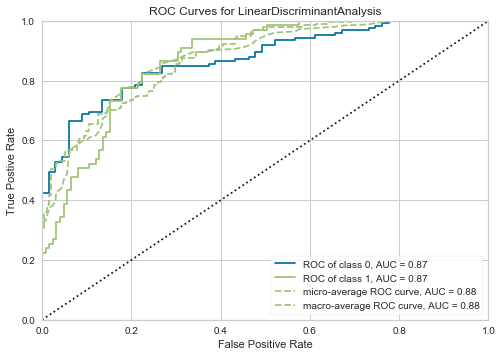

In [12]:
# show to analyse the performance of the model acorss
# different aspects such as AUC, confusion_matrix, decision boundary

# AUC plot
plot_model(tuned_lda, plot='auc')

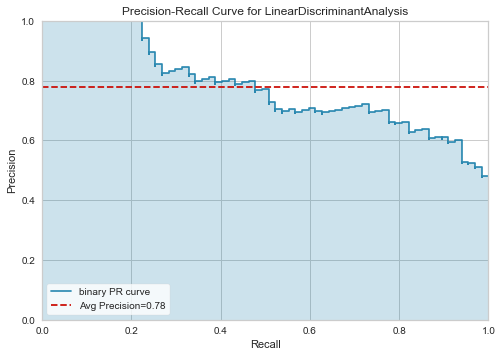

In [13]:
# precision-recall curve
plot_model(tuned_lda, plot='pr')

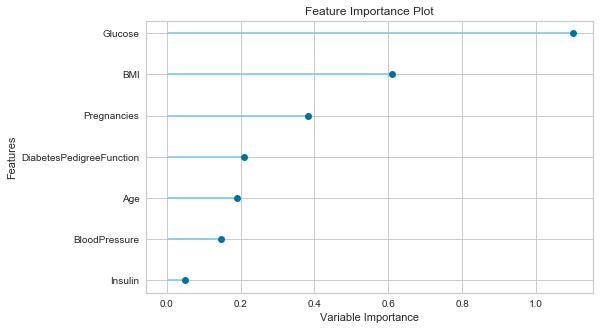

In [14]:
# feature importance plot
plot_model(tuned_lda, plot='feature')

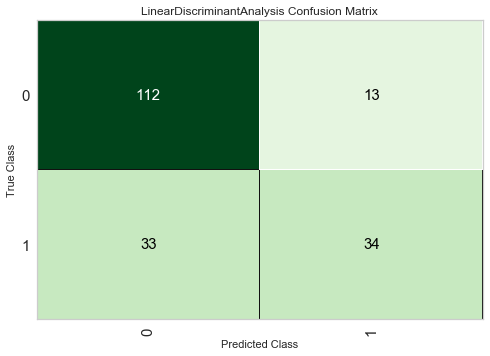

In [15]:
# cofusion-matrix plot
plot_model(tuned_lda, plot='confusion_matrix')

# Logistic Regression

In [16]:
# let's try another algorithm i.e. logistic regression
lr = create_model('lr')

# show the paramters of the model
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7586,0.8069,0.4762,0.7692,0.5882,0.4306
1,0.8276,0.8579,0.5500,0.9167,0.6875,0.5785
2,0.8103,0.8197,0.5000,0.9091,0.6452,0.5302
3,0.8276,0.8145,0.7000,0.7778,0.7368,0.6092
4,0.6724,0.7145,0.4500,0.5294,0.4865,0.2483
5,0.8621,0.9066,0.7500,0.8333,0.7895,0.6873
6,0.7193,0.8027,0.6500,0.5909,0.6190,0.3976
7,0.7193,0.8176,0.4000,0.6667,0.5000,0.3214
8,0.7544,0.8797,0.4500,0.7500,0.5625,0.4062
9,0.7544,0.7919,0.6500,0.6500,0.6500,0.4608


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [17]:
# tune the model
tuned_lr = tune_model('lr')


# show the parameters of the tuned model
print(tuned_lr)

# observation: 
#              Accuracy AUC     F1
# before tune: 0.7706   0.8212  0.6265
#  after tune: 0.7653   0.8211  0.6187
#

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7586,0.8082,0.4762,0.7692,0.5882,0.4306
1,0.8276,0.8579,0.5500,0.9167,0.6875,0.5785
2,0.8103,0.8171,0.5000,0.9091,0.6452,0.5302
3,0.8276,0.8145,0.7000,0.7778,0.7368,0.6092
4,0.6724,0.7145,0.4500,0.5294,0.4865,0.2483
5,0.8621,0.9066,0.7500,0.8333,0.7895,0.6873
6,0.7018,0.8027,0.6500,0.5652,0.6047,0.3671
7,0.7018,0.8189,0.3500,0.6364,0.4516,0.2698
8,0.7544,0.8797,0.4500,0.7500,0.5625,0.4062
9,0.7368,0.7905,0.6500,0.6190,0.6341,0.4289


LogisticRegression(C=1.94, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [18]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
# which model should I use ? Logistic Regression or Linear Discriminant Analysis ?
# let's compare the metric.  The metrics are quite similar.
#
# Linear Discriminant Analysis
# ----------------------------
#              Accuracy AUC     F1
#  after tune: 0.7602   0.8193  0.6086
#
# Logistic Regression
# -------------------
#              Accuracy AUC     F1
#  after tune: 0.7653   0.8211  0.6187
#
# Verdict: Logistic Regression (due to better accuracy and F1 score)
#
# before finalizing the model, it is advisiable to perform
# one final check by predicting the test dataset
# and review the evaluation metrics

In [20]:
# let' see how the two algorithms performed when applying the remaining data i.e. test data

In [21]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.7604,0.8722,0.5075,0.7234,0.5965,0.4335


,BMI,DiabetesPedigreeFunction,Glucose,BloodPressure,Insulin,Pregnancies,Age,Outcome,Label,Score
0,0.115169,1.000033,1.161295,0.459827,-0.692891,0.046014,-0.190672,1,1,0.6441
1,-0.950952,2.011773,-0.966911,-0.057150,-0.692891,-0.844885,0.234767,0,0,0.0856
2,-1.255559,-0.026807,-0.153185,0.149641,0.062521,0.046014,0.319855,0,0,0.1420
3,-0.417892,0.993993,0.159787,-0.677523,0.626910,-0.844885,-1.041549,0,0,0.2251
4,0.940144,-0.712374,-0.278373,0.459827,-0.692891,0.046014,0.404942,0,0,0.3251
...,...,...,...,...,...,...,...,...,...,...
187,0.419775,-1.020427,-0.184482,-3.572597,-0.692891,1.827813,-0.360847,0,1,0.5288
188,0.369008,-0.745596,-0.497453,-0.574128,0.123302,-0.547919,-0.701198,0,0,0.1605
189,-0.570195,-0.700294,0.785730,-3.572597,-0.692891,-0.547919,-0.445935,1,0,0.4302
190,-0.265588,-0.615731,1.505564,0.253036,0.392471,-0.250952,-0.190672,1,1,0.5654


In [22]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.7708,0.8593,0.5373,0.7347,0.6207,0.4621


,BMI,DiabetesPedigreeFunction,Glucose,BloodPressure,Insulin,Pregnancies,Age,Outcome,Label,Score
0,0.115169,1.000033,1.161295,0.459827,-0.692891,0.046014,-0.190672,1,1,0.6783
1,-0.950952,2.011773,-0.966911,-0.057150,-0.692891,-0.844885,0.234767,0,0,0.0828
2,-1.255559,-0.026807,-0.153185,0.149641,0.062521,0.046014,0.319855,0,0,0.1323
3,-0.417892,0.993993,0.159787,-0.677523,0.626910,-0.844885,-1.041549,0,0,0.2442
4,0.940144,-0.712374,-0.278373,0.459827,-0.692891,0.046014,0.404942,0,0,0.3495
...,...,...,...,...,...,...,...,...,...,...
187,0.419775,-1.020427,-0.184482,-3.572597,-0.692891,1.827813,-0.360847,0,1,0.6643
188,0.369008,-0.745596,-0.497453,-0.574128,0.123302,-0.547919,-0.701198,0,0,0.1885
189,-0.570195,-0.700294,0.785730,-3.572597,-0.692891,-0.547919,-0.445935,1,1,0.5630
190,-0.265588,-0.615731,1.505564,0.253036,0.392471,-0.250952,-0.190672,1,1,0.5798


In [23]:
# tuned Logistic Regression model has better accuracy and F1 score
#                                 Accuracy  F1
# Linear Discriminant Analysis :  0.7604    0.5965
# Logistic Regression          :  0.7708    0.6207

In [24]:
# finalize model for deployment
#
# The purpose of this function is to train the model on the complete dataset before it is deployed in production.
#
# From PyCaret documentation:
# One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including 
# the test set is used for training.
#
#final_lr = finalize_model(tuned_lr)

In [25]:
# final model parameters for deployment
#print(final_lr)

In [26]:
#predict_model(final_lr)

In [27]:
# saving the model
save_model(tuned_lr, 'Tuned_Logistic_Regression_model_April_2020')

Transformation Pipeline and Model Succesfully Saved


In [28]:
# loading the saved model
load_model = load_model('Tuned_Logistic_Regression_model_April_2020')

Transformation Pipeline and Model Sucessfully Loaded


# Conclusion
From development to final model, it was made easy by PyCaret.  I certainly developed lesser lines of code when compared to my earlier work. I can perform experiment quicky and therefore discovered better model for the dataset i.e. Logistic Regression.  

Result --> ROC-AUC score improved from 0.8336 (previous analysis) to 0.8593 (Logistic Regression).  

Finally the PyCaret tutorial mentioned using ensembler method to improve the accuracy. Some thing I will like to try next. 


### Note:

[Source](https://machinelearningmastery.com/handle-missing-data-python/)
"The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately 77%."

Comment: The model, based on Logistic Regression, achieved an accuracy of 77.08%.